<a href="https://colab.research.google.com/github/Patojukarthikeya73/Infosys_Springboard/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install transformers torch matplotlib ipywidgets radon --quiet

# Enable ipywidgets for interactive UI
!jupyter nbextension enable --py widgetsnbextension



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from getpass import getpass

HF_TOKEN = getpass("Colab ")


Colab ··········


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

models = (
    {"DeepSeek": "deepseek-ai/deepseek-coder-1.3b-instruct",
    "Phi-2": "microsoft/phi-2",
    "Gemma": "google/gemma-2b-it",
    "Stable-Code": "stabilityai/stable-code-3b",
    "Replit-Code": "Salesforce/codegen-350M-multi"}
)

In [ ]:
# Function to safely load a model
def load_model(model_name, model_id):
    print(f"Loading {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=HF_TOKEN)
    try:
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            device_map="auto",
            use_auth_token=HF_TOKEN
        )
    except RuntimeError as e:
        print(f"⚠️ Could not load {model_name}: {e}")
        model = None
    return tokenizer, model



In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "Salesforce/codegen-350M-mono"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

prompt = "Write a Python function to calculate factorial recursively."

output = generator(
    prompt,
    max_new_tokens=150,
    pad_token_id=tokenizer.eos_token_id
)

print(output[0]['generated_text'])


tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Write a Python function to calculate factorial recursively.

This program will take a user-input as an integer x, and calculate factorial recusively from this number, using recurrence rules of mathematics.

The recursion works in two different ways.
(1) It supports loops. The outer loop is limited to looping up to the value of the passed argument. The inner loop is limited to the recursion of the outer loop till the the value of the argument or value of the outer loop is reached.
(2) It only allows to use loop boundaries within the while loop.

# For this project you use following recursion:

a = 0 # initial value
x = int(input("Please enter an integer (or 'q'


In [ ]:
import re
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze

generated_output = output[0]['generated_text']

# Loosened pattern for detecting Python-looking code blocks
code_pattern = re.findall(r"(def .*?:|class .*?:|import .*|from .*|if .*:|for .*:|while .*:|try:|except.*:|return .*)", generated_output)

python_code = "\n".join(code_pattern)

if not python_code.strip():
    print("⚠️ No valid Python code detected. Try refining your model prompt.")
else:
    print("----- Extracted Python Code -----")
    print(python_code)

    # Metrics
    try:
        cc = cc_visit(python_code)
        print("\nCyclomatic Complexity per function/class:")
        for item in cc:
            print(f"{item.name}: {item.complexity}")
    except Exception as e:
        print("Error computing Cyclomatic Complexity:", e)

    try:
        mi = mi_visit(python_code, True)
        print(f"\nMaintainability Index: {mi}")
    except Exception as e:
        print("Error computing Maintainability Index:", e)

    try:
        raw_metrics = analyze(python_code)
        print(f"\nLines of Code (LOC): {raw_metrics.loc}")
    except Exception as e:
        print("Error computing LOC:", e)


----- Extracted Python Code -----
from this number, using recurrence rules of mathematics.
Error computing Cyclomatic Complexity: invalid syntax (<unknown>, line 1)
Error computing Maintainability Index: invalid syntax (<unknown>, line 1)

Lines of Code (LOC): 1


In [ ]:
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze
import re, ast

generated_code = output[0]['generated_text']

def clean_to_python_only(text):
    """
    Extracts only likely Python code lines from model output.
    Removes English descriptions and non-Python syntax.
    """
    code_lines = []
    for line in text.splitlines():
        s = line.strip()

        # Skip non-code lines
        if not s:
            continue
        if re.match(r'^[A-Z].*[.!?]$', s):  # plain English sentence
            continue
        if re.match(r'^(public|static|int|double|float|String|@|//|\*|/\*)', s):
            continue
        if '{' in s or '}' in s or s.endswith(';'):
            continue

        # Keep probable Python code
        if any(s.startswith(k) for k in ("def ", "class ", "for ", "while ", "if ", "return", "import", "from", "@")) or s.startswith("    "):
            code_lines.append(line)
    return "\n".join(code_lines)

python_code = clean_to_python_only(generated_code)

# Validate extracted code
try:
    ast.parse(python_code)
except SyntaxError:
    print("⚠️ Removed invalid non-code text from model output.")
    python_code = "\n".join([line for line in python_code.splitlines() if not re.match(r'^[A-Z]', line)])
    ast.parse(python_code)

print("----- Extracted Python Code -----")
print(python_code)

# Metrics computation
try:
    cc = cc_visit(python_code)
    print("\nCyclomatic Complexity per function:")
    for c in cc:
        print(f"  {c.name}: {c.complexity}")
except Exception as e:
    print("Error in Cyclomatic Complexity:", e)

try:
    mi = mi_visit(python_code, True)
    print(f"\nMaintainability Index: {mi}")
except Exception as e:
    print("Error in Maintainability Index:", e)

try:
    raw_metrics = analyze(python_code)
    print(f"\nLines of Code (LOC): {raw_metrics.loc}")
except Exception as e:
    print("Error in LOC:", e)


----- Extracted Python Code -----


Cyclomatic Complexity per function:

Maintainability Index: 100.0

Lines of Code (LOC): 0


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 1: Write a Python program to add 5 and 4
------------------------------------------------------------
Write only Python code for: Write a Python program to add 5 and 4
# numbers and print the sum
#
def calcSum(x, y) :
    return x + y + x + y


def multiply(a, b):
    c = calcSum(a, b)
    print(c)

    return c


def subtract(a, b):
    c = calcSum(a, b)
    print(c)

    return c


def square(a, b):
    c = calcSum(a, b)
    print(c)

    return c


def divide(a, b):
    c = calcSum(a, b)
    print(c)

    return c


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 2: Write a Python function to check if a number is prime
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a number is prime or not

# The function will take as parameters two parameters: 1. an int number (between 1 and 'inf') to use as a check for which number is prime
# Similarly to the function above the function will return whether or not the number is prime or not or not

def is_prime(n):
    if n == 0 or n == 1:
        return False
    else:
        for i in range(2, n):
            if n % i == 0:
                return False
        else:
            return True


# The main function is the one that takes as an input that


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 3: Write a Python code to reverse a string
------------------------------------------------------------
Write only Python code for: Write a Python code to reverse a string 
# or print a new string that has the same structure as the first one but the 
# first two characters not equal to the second. 

x = "Hello"
y = x[::-2]
print(y)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 4: Write a Python program to calculate factorial using recursion
------------------------------------------------------------
Write only Python code for: Write a Python program to calculate factorial using recursion. "
             "User will know how to calculate factorial by writing in recursion. For example the factorial of "
             "4 is 1 to the 4th power."
             "You can also use recursion to compute the factorial of a given number. And in recursion each time you "
             "have to input the number. That number is the answer of the factorial."
             "You should know all the recursion in mind. For example if you have the input 2 because 2^1 is 2 and the "
             "answer of 1*5 is 5, then your answer is 0 because you can even recurse once because 2^2 is 2 and the "
             "answer


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 5: Write a Python script to sort a list of numbers
------------------------------------------------------------
Write only Python code for: Write a Python script to sort a list of numbers.
# Write a Python function to randomly sort a list of numbers based on whether the value is prime or not.
# Make sure the funciton does not return anything, it should print a list containing only the prime numbers to the
# screen.

# I made this a simple function and imported numpy as np

import numpy as np

def sort_list(val):
    global mylist
    mylist = np.empty(len(mylist), dtype = list) # this will use mylist to set the number of values for the mylist
    mylist[:] = []
    values = [] # this is a local variable to write everything in
    for i


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 6: Write a Python function to count vowels in a string
------------------------------------------------------------
Write only Python code for: Write a Python function to count vowels in a string.


str = "geeksforgeeksforgeeks"
vowels = {'a','e','i','o','u'}
l=[[1,2],[2,4],[4,6]]
def count_vowels(str):
    a = 0
    b = 0
    count = 0
    for i in str:
        if i in vowels:
            a+=1
            b+=1
        else:
            break
    
    if a==b:
        count = 0+a+b
        print(count)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 7: Write a Python code to find the maximum number in a list
------------------------------------------------------------
Write only Python code for: Write a Python code to find the maximum number in a list.
"""
import random


def find_maximum(a_list):

    minimum = a_list[0]
    for number in a_list:
        minimum = number if number < minimum else minimum
    return minimum


def main():
    list_of_lucky_no = [random.randint(1, 100), random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)]
    print(list_of_lucky_no)
    print('Minimum of this lucky: %d' % find


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 8: Write a Python function to check if a string is a palindrome
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a string is a palindrome.

You can assume that there always is only one palindrome in a given string.

Input Format

A single string,.

Constraints

There will always be at least one palindrome in the string. (String is case-sensitive.)

Output Format

Output the boolean value of "True" in the string.

Sample Input


abc

Sample Output

true

Explanation

A string is a palindrome if it reads the same forward and backward as long as the letters are the same.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 9: Write a Python code to calculate area of a circle given radius
------------------------------------------------------------
Write only Python code for: Write a Python code to calculate area of a circle given radius.

>>> area = 1.3*3.14*r**2
>>> print(area)  # 10
area = 1.3*3.14*r**2

Prompt 10: Write a Python function to convert Celsius to Fahrenheit
------------------------------------------------------------
Write only Python code for: Write a Python function to convert Celsius to Fahrenheit
from functools import reduce
#Write a Python function that, given a temperature in Celsius, and convert it to Fahrenheit
#Then print how many degrees Fahrenheit is remaining in that Fahrenheit. For all temperatures above,
#return the value of the remainder
#Write a Python program to help you convert a string into a list, which does not include new lines
#and spaces.
#Use reduce to build a Python function to convert Celsius to FAHRENHEIT.
#Use reduce to calculate the addition of one an

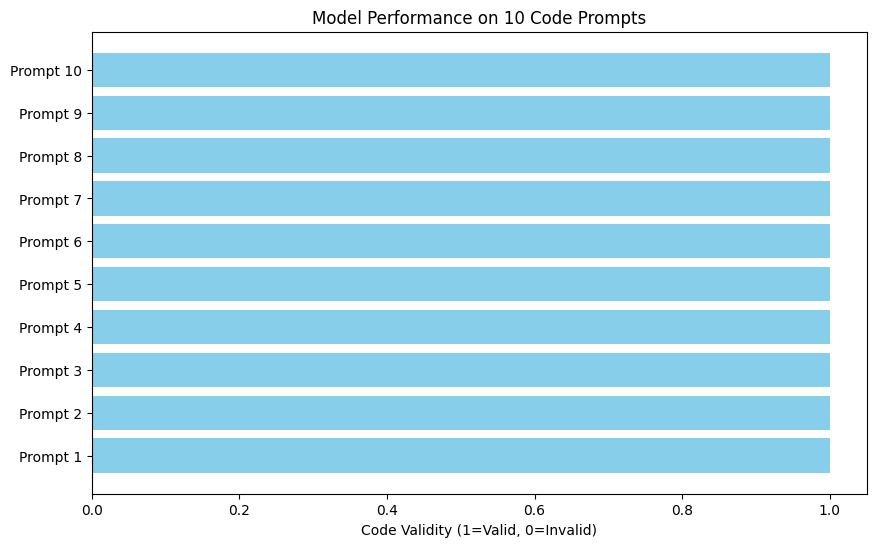


✅ Model generated valid Python code for 10 of 10 prompts.
📈 Accuracy: 100.0%


In [1]:
!pip install transformers ipywidgets matplotlib accelerate --quiet

from transformers import pipeline
import matplotlib.pyplot as plt
import re

# 💡 Lightweight instruction-tuned model
generator = pipeline(
    "text-generation",
    model="Salesforce/codegen-350M-mono",
    tokenizer="Salesforce/codegen-350M-mono",
    device_map="auto"
)

prompts = [
    "Write a Python program to add 5 and 4",
    "Write a Python function to check if a number is prime",
    "Write a Python code to reverse a string",
    "Write a Python program to calculate factorial using recursion",
    "Write a Python script to sort a list of numbers",
    "Write a Python function to count vowels in a string",
    "Write a Python code to find the maximum number in a list",
    "Write a Python function to check if a string is a palindrome",
    "Write a Python code to calculate area of a circle given radius",
    "Write a Python function to convert Celsius to Fahrenheit"
]

def generate_code(prompt):
    result = generator(f"Write only Python code for: {prompt}", max_new_tokens=150)
    text = result[0]["generated_text"]
    clean = re.sub(r"```python|```", "", text)
    if re.search(r"(def |print|for |if |import )", clean):
        score = 1
    else:
        score = 0
    return clean.strip(), score

scores = []
for i, p in enumerate(prompts):
    code, score = generate_code(p)
    print(f"\nPrompt {i+1}: {p}\n{'-'*60}\n{code}")
    scores.append(score)

plt.figure(figsize=(10,6))
plt.barh(range(len(prompts)), scores, color='skyblue')
plt.yticks(range(len(prompts)), [f"Prompt {i+1}" for i in range(len(prompts))])
plt.xlabel("Code Validity (1=Valid, 0=Invalid)")
plt.title("Model Performance on 10 Code Prompts")
plt.show()

accuracy = sum(scores)/len(scores)*100
print(f"\n✅ Model generated valid Python code for {sum(scores)} of {len(prompts)} prompts.")
print(f"📈 Accuracy: {accuracy:.1f}%")
